# Popular Music in Recession Years

## Cleaning the Data Sets

In [ ]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.
%cd '/drive/MyDrive/Colab Notebooks/INF2190/INF2190 Final Project/'

Mounted at /drive
/drive/MyDrive/Colab Notebooks/INF2190/INF2190 Final Project


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree


### Cleaning BillBoard Hot 100

In [ ]:
#Import pandas and read the Billboard 100 dataframe
import pandas as pd
hot100 = pd.read_csv('data/hot-100-unique.csv')


#Convert characters in the dataframe to lowercase
def dataframe_to_lower(df):
  return df.map(lambda x: x.lower() if isinstance(x, str) else x)

hot100 = dataframe_to_lower(hot100)


#Check if there are null values, replace found null values with 'NA'
def check_null(df):
  return df.isnull().sum()
null_count = check_null(hot100)
print(null_count)

hot100 = hot100.fillna('NA')


#Converting chart_week to date format and create a new column for year
hot100['chart_week'] = pd.to_datetime(hot100['chart_week'])
hot100['Year'] = hot100['chart_week'].dt.year

hot100.info()

chart_week          0
current_week        0
title               0
performer           0
last_week       12870
peak_pos            0
wks_on_chart        0
tags            12936
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14678 entries, 0 to 14677
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   chart_week    14678 non-null  datetime64[ns]
 1   current_week  14678 non-null  int64         
 2   title         14678 non-null  object        
 3   performer     14678 non-null  object        
 4   last_week     14678 non-null  object        
 5   peak_pos      14678 non-null  int64         
 6   wks_on_chart  14678 non-null  int64         
 7   tags          14678 non-null  object        
 8   Year          14678 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(4)
memory usage: 974.8+ KB


### Cleaning the US Recession

In [ ]:
# opening the csv file

recession_all_years = pd.read_csv('data/USREC.csv')

recession_all_years.head()

DATE  USREC
0  1854-12-01      1
1  1855-01-01      0
2  1855-02-01      0
3  1855-03-01      0
4  1855-04-01      0

In [ ]:
# gain information and check for missing values
def retrievinginfo(dataFrame):
  # retrieving general info
  print("Basic information about the dataset: ", '\n', dataFrame.info())
  # checking for missing values
  missingValue = dataFrame.isnull().sum()
  print("The Number of missing values in the dataset are: ", missingValue)


# clean to date time
def cleaning_date(dataFrame,column_name, new_column):
  dataFrame[column_name] = pd.to_datetime(dataFrame[column_name], errors='coerce')
  # extract the year from date column to create year column
  dataFrame[new_column] = dataFrame[column_name].dt.year

# Creating new data frame filtering out the years that are not in the range of 1990-2024
def createFrame(dataFrame, filter_column):
  newDataFrame = dataFrame[(dataFrame[filter_column] >= 1990) & (dataFrame[filter_column] <= 2024)]
  return newDataFrame

# function to rename column names to standardize and make more clear
def rename_columns(dataFrame, column_names):
  return dataFrame.rename(columns=column_names, inplace=False)


# execute the functions
column_new_names = {'DATE':'recession date','USREC':'recession'} # created data frame to store changes in column titles
retrievinginfo(recession_all_years)
cleaning_date(recession_all_years, 'DATE', 'Year')

# saving the filtered clean version to new dataframe
recession_years = createFrame(recession_all_years, 'Year')
recession_years = rename_columns(recession_years, column_new_names)

# verify it is clean
recession_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2039 non-null   datetime64[ns]
 1   USREC   2039 non-null   int64         
 2   Year    2039 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 39.9 KB
Basic information about the dataset:  
 None
The Number of missing values in the dataset are:  DATE     0
USREC    0
Year     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1621 to 2038
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   recession date  418 non-null    datetime64[ns]
 1   recession       418 non-null    int64         
 2   Year            418 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 11.4 KB


### Merging the Data sets

In [ ]:
# merging the year and recession columns to the billboard hot 100 based on year
recession_music = hot100.merge(recession_years[['Year', 'recession']], on='Year', how='inner')

# save the new merged data frame to a csv file (so later it will be easy to open and join with the spotify)

recession_music.to_csv('recession_music.csv', index=False)

In [ ]:
recession_music.head()

chart_week  current_week           title      performer last_week  peak_pos  \
0 1990-01-06            51  all or nothing  milli vanilli        NA        51   
1 1990-01-06            51  all or nothing  milli vanilli        NA        51   
2 1990-01-06            51  all or nothing  milli vanilli        NA        51   
3 1990-01-06            51  all or nothing  milli vanilli        NA        51   
4 1990-01-06            51  all or nothing  milli vanilli        NA        51   

   wks_on_chart tags  Year  recession  
0             1   NA  1990          0  
1             1   NA  1990          0  
2             1   NA  1990          0  
3             1   NA  1990          0  
4             1   NA  1990          0

### Cleaning the Final Merged Document

In [ ]:
directory_path = './data/spootify_api_data'
directory_files = os.listdir(directory_path)

df = pd.DataFrame()

for file in directory_files:
    df_file = pd.read_csv(os.path.join(directory_path, file),low_memory=False)
    df = pd.concat([df, df_file])

df.columns.to_list()

df = df.loc[:, 'data_date':].drop_duplicates(subset=['billboard_song_title', 'billboard_song_artist'])

spotify_data = df

# Task 1 and 2: Standardize name columns by removing irregular characters and convert to lowercase
# Replace NaN values with 'NA' for easy standardization
spotify_data = spotify_data.fillna("NA")

spotify_data['billboard_title_cleaned'] = spotify_data['billboard_song_title']
spotify_data['billboard_artist_cleaned'] = spotify_data['billboard_song_artist']

# Define columns to standardize
name_columns = ['song_name', 'song_artist_name', 'billboard_title_cleaned', 'billboard_artist_cleaned']

for col in name_columns:
    # Convert to lowercase
    spotify_data[col] = spotify_data[col].str.lower()

    # Remove non-alphanumeric characters (letters and numbers only)
    spotify_data[col] = spotify_data[col].apply(lambda x: ''.join(char for char in str(x) if char.isalnum() or char.isspace()))

# Task 4: Address empty tuples (replacing any empty lists or tuples with 'NA')
spotify_data = spotify_data.applymap(lambda x: "NA" if x == () or x == [] else x)

# Task 5: Remove specified columns if needed
# Example: Remove 'song_isrc' and 'track_img_url' (change these to actual columns if required)
columns_to_remove = ['song_isrc', 'track_img_url']  # Adjust these column names as needed
spotify_data.drop(columns=columns_to_remove, errors='ignore', inplace=True)

# remove unnecesary columns
spotify_data = spotify_data[['billboard_song_title', 'billboard_song_artist', 'song_name', 'song_artist_name', 'song_artist_followers',
                             'song_len_ms', 'song_explicity', 'track_release_date', 'track_release_date_precision', 'song_acousticness', 'song_danceability',
                             'song_energy', 'song_instrumentalness', 'song_key', 'song_liveness', 'song_loudness', 'song_modality', 'song_speechiness',
                             'song_tempo', 'song_time_signature', 'song_valence', 'billboard_title_cleaned', 'billboard_artist_cleaned']]


spotify_data.columns

# reorder the columns to save processing time

new_column_order = ['billboard_song_title', 'billboard_song_artist', 'billboard_title_cleaned', 'song_name', 'billboard_artist_cleaned',
                    'song_artist_name', 'song_artist_followers', 'song_len_ms', 'song_explicity', 'track_release_date',
                    'track_release_date_precision', 'song_acousticness',  'song_danceability', 'song_energy', 'song_instrumentalness',
                    'song_key', 'song_liveness', 'song_loudness', 'song_modality', 'song_speechiness', 'song_tempo', 'song_time_signature',
                    'song_valence']

spotify_data = spotify_data[new_column_order]
spotify_data.head()

# remove rows where the spotify API accidentally picked up the incorrect song information
# we do this by matching the bill_hot_100 song and artist names to the spotify API song and artist names

# step 1: create boolean that tells you if song names match
spotify_data['song_name_match'] = spotify_data['billboard_title_cleaned'] == spotify_data['song_name']
spotify_data['artist_name_match'] = spotify_data['billboard_artist_cleaned'] == spotify_data['song_artist_name']


# filter rows where both artist and song do not match the billboard hot 100
filtered_rows = spotify_data[(spotify_data['song_name_match'] == False) & (spotify_data['artist_name_match'] == False)]

# create backup of spotify data
spotify_data_backup = spotify_data.copy()
spotify_data.sort_index()

# remove rows where song and artist are both different
spotify_data = spotify_data[~((spotify_data['song_name_match'] == False) &
                              (spotify_data['artist_name_match'] == False))]


filtered_rows = spotify_data[(spotify_data['song_name_match'] == False)]

# load lyrics dataframe
lyrics = pd.read_csv('data/hot-100-unique-lyrics.csv')

spotify_data = spotify_data.rename({'billboard_song_title': 'title', 'billboard_song_artist': 'performer'}, axis=1)

spotify_lyrics = pd.merge(spotify_data, lyrics, on=['title', 'performer'], how='left')

# remove unnecessary columns
spotify_lyrics = spotify_lyrics[['title', 'performer', 'song_artist_followers',
       'song_len_ms', 'song_explicity', 'track_release_date',
       'track_release_date_precision', 'song_acousticness',
       'song_danceability', 'song_energy', 'song_instrumentalness', 'song_key',
       'song_liveness', 'song_loudness', 'song_modality', 'song_speechiness',
       'song_tempo', 'song_time_signature', 'song_valence', 'lyrics', 'lyrics_tokenized', 'stop_words_ratio',
       'title_tokenized', 'sentiment_compound_score']]

# Save the cleaned data to a new CSV file
spotify_lyrics.to_csv('unique_spotify_and_lyrics.csv')

# load the original dataset
import datetime
billboard = pd.read_csv('data/hot-100-current.csv')
billboard['chart_week'] = billboard['chart_week'].astype('datetime64[ns]')

# only include data for the scope of the project
billboard = billboard.loc[(billboard['chart_week'] > '1988-12-31')]

# remove unnecessary columns
billboard = billboard[['chart_week', 'current_week', 'peak_pos', 'title', 'performer', 'wks_on_chart']]

billboard['month'] = billboard['chart_week'].dt.month
billboard['year'] = billboard['chart_week'].dt.year

# load recession data
recession = pd.read_csv('data/USREC.csv')

recession['DATE'] = recession['DATE'].astype('datetime64[ns]')
recession['month'] = recession['DATE'].dt.month
recession['year'] = recession['DATE'].dt.year

# join the billboard and recession data
billboard_recession = pd.merge(billboard, recession, on=['month', 'year'], how='left')
billboard_recession = billboard_recession[['chart_week', 'current_week', 'peak_pos', 'title', 'performer', 'wks_on_chart', 'USREC', 'year']]
billboard_recession = billboard_recession.rename({'USREC': 'recession'}, axis=1)

# join the spotify_lyrics dataset to the original dataset
billboard_spotify_lyrics = pd.merge(billboard_recession, spotify_lyrics, on=['title', 'performer'], how='left')

# drop na rows
billboard_cleaned = billboard_spotify_lyrics.dropna()

# save to csv
billboard_cleaned.to_csv('data/billboard-merged.csv', index=False)

<ipython-input-35-53c43f17c097>:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spotify_data = spotify_data.applymap(lambda x: "NA" if x == () or x == [] else x)


## Descriptive Analysis

In [ ]:
# load the dataset to avoid running prior files
recession_music = pd.read_csv('data/billboard-merged.csv')
recession_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142860 entries, 0 to 142859
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   chart_week                    142860 non-null  object 
 1   current_week                  142860 non-null  int64  
 2   peak_pos                      142860 non-null  int64  
 3   title                         142860 non-null  object 
 4   performer                     142860 non-null  object 
 5   wks_on_chart                  142860 non-null  int64  
 6   recession                     142860 non-null  int64  
 7   year                          142860 non-null  int64  
 8   song_artist_followers         142860 non-null  float64
 9   song_len_ms                   142860 non-null  float64
 10  song_explicity                142860 non-null  bool   
 11  track_release_date            142860 non-null  object 
 12  track_release_date_precision  142860 non-nul

In [ ]:
#Define function for generating list of top songs,
def top_n(df, artist, song, criteria, n):
  df['artist_song'] = df[artist]+'_'+df[song]
  top_music = df[df[criteria]==1]
  frequencies = top_music.groupby('artist_song').size().reset_index(name='count')
  top_chart = frequencies.sort_values(by='count', ascending=False).head(n)
  top_chart[[artist, song]] = top_chart['artist_song'].str.split('_', expand=True)
  result = top_chart[[artist, song, 'count']].reset_index(drop = True)
  return result

#Calculate the top 20 songs overall
top20_overall = top_n(recession_music,'performer', 'title', 'peak_pos', 20)
print('top 20 overall')
print(top20_overall)
print('\n')

#Calculate the top 20 songs during non recession periods
not_recession = recession_music[recession_music['recession'] == 0]
not_recession.head()

top20_not_recession= top_n(not_recession, 'performer', 'title', 'peak_pos', 20)
print('top 20 not recession')
print(top20_not_recession)
print('\n')

#Calculate the top 20 songs during recession periods
recession_years = recession_music[recession_music['recession'] == 1]
top20_recession = top_n(recession_years,'performer', 'title', 'peak_pos', 20)
print('top 20 recession')
print(top20_recession)
print('\n')

#Calculate the top 20 songs in 2007, 2008, 2009 during the recession (08' recession)

#Create a list of years to select
years_toselect08 = {2007, 2008, 2009}
recession08 = recession_years[recession_years['year'].isin(years_toselect08)]
top20_recession08 = top_n(recession08,'performer', 'title', 'peak_pos', 20)
print('top 20 recession 2008')
print(top20_recession08)
print('\n')

#Calculate the top 20 songs post 08 recession (3 years)
years_toselectpost08 = {2009, 2010, 2011}
postrecession08 = not_recession[not_recession['year'].isin(years_toselectpost08)]
top20_postrecession08 = top_n(postrecession08,'performer', 'title', 'peak_pos', 20)
print('top 20 post recession 2008')
print(top20_postrecession08)
print('\n')

#Calculate the top 20 songs pre 08 recession (3 years)
years_toselectpre08 = {2007, 2006, 2005}
prerecession08 = not_recession[not_recession['year'].isin(years_toselectpre08)]
top20_prerecession08 = top_n(prerecession08, 'performer', 'title', 'peak_pos', 20)
print('top 20 pre-recession 2008')
print(top20_prerecession08)
print('\n')

top 20 overall
                                    performer  \
0                                  The Weeknd   
1                                Harry Styles   
2                                  Ed Sheeran   
3                                 Miley Cyrus   
4                         The Black Eyed Peas   
5   LMFAO Featuring Lauren Bennett & GoonRock   
6                           Justin Timberlake   
7                              Olivia Rodrigo   
8                                Taylor Swift   
9           The Chainsmokers Featuring Halsey   
10                 The Weeknd & Ariana Grande   
11                                Post Malone   
12                                      Adele   
13                             Jonas Brothers   
14                              Savage Garden   
15                                   Coldplay   
16                     Gotye Featuring Kimbra   
17                                       Next   
18                                 Ed Sheeran   
19   

<ipython-input-37-075abf21f3b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist_song'] = df[artist]+'_'+df[song]
<ipython-input-37-075abf21f3b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist_song'] = df[artist]+'_'+df[song]
<ipython-input-37-075abf21f3b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Overall - Mean: 121.09, Std Dev: 28.82
Recession Years - Mean: 122.26, Std Dev: 28.86
Non-Recession Years - Mean: 120.98, Std Dev: 28.81
0         150.273
1          67.086
2         119.705
3         140.453
4         141.981
           ...   
142855     80.088
142856    176.056
142857    150.050
142858    145.976
142859    174.185
Name: song_tempo, Length: 142860, dtype: float64


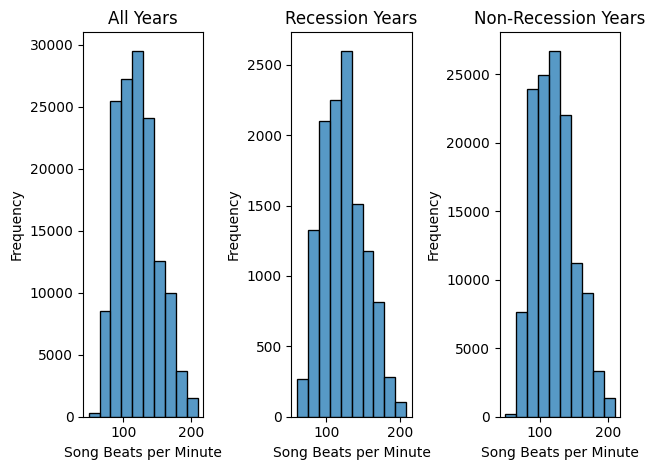

In [ ]:
# Descriptive statistics for beats per minute: Mean and Standard Deviation
mean_bpm = recession_music["song_tempo"].mean()
std_bpm = recession_music["song_tempo"].std()

# Separate data into recession and non-recession years
recession_bpm = recession_music[recession_music["recession"] == 1]["song_tempo"]
non_recession_bpm = recession_music[recession_music["recession"] == 0]["song_tempo"]

mean_recession = recession_bpm.mean()
std_recession = recession_bpm.std()

mean_non_recession = non_recession_bpm.mean()
std_non_recession = non_recession_bpm.std()

# Print results
print(f"Overall - Mean: {mean_bpm:.2f}, Std Dev: {std_bpm:.2f}")
print(f"Recession Years - Mean: {mean_recession:.2f}, Std Dev: {std_recession:.2f}")
print(f"Non-Recession Years - Mean: {mean_non_recession:.2f}, Std Dev: {std_non_recession:.2f}")

# Plot histograms
print(recession_music['song_tempo'])
# Histogram for all years
plt.subplot(1,3,1)
plot_1 = sns.histplot(recession_music["song_tempo"], bins=10)
plt.title("All Years")
plt.xlabel("Song Beats per Minute")
plt.ylabel("Frequency")


# Histogram for recession years
plt.subplot(1,3,2)
plot_2 = sns.histplot(recession_bpm, bins=10)
plt.title("Recession Years")
plt.xlabel("Song Beats per Minute")
plt.ylabel("Frequency")

# Histogram for non-recession years
plt.subplot(1,3,3)
plot_3 = sns.histplot(non_recession_bpm, bins=10)
plt.title("Non-Recession Years")
plt.xlabel("Song Beats per Minute")
plt.ylabel("Frequency")
plt.tight_layout()

Overall - Mean: 0.63, Std Dev: 0.14
Recession Years - Mean: 0.62, Std Dev: 0.14
Non-Recession Years - Mean: 0.64, Std Dev: 0.14
0         0.336
1         0.598
2         0.754
3         0.682
4         0.604
          ...  
142855    0.437
142856    0.693
142857    0.530
142858    0.475
142859    0.391
Name: song_danceability, Length: 142860, dtype: float64


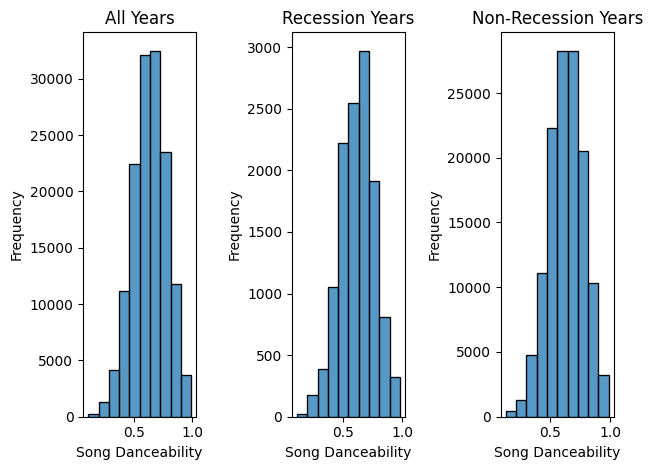

In [ ]:
# Descriptive statistics for song danceability: Mean and Standard Deviation
mean_all = recession_music["song_danceability"].mean()
std_all = recession_music["song_danceability"].std()

# Separate data into recession and non-recession years
recession_danceability = recession_music[recession_music["recession"] == 1]["song_danceability"]
non_recession_danceability = recession_music[recession_music["recession"] == 0]["song_danceability"]

mean_recession = recession_danceability.mean()
std_recession = recession_danceability.std()

mean_non_recession = non_recession_danceability.mean()
std_non_recession = non_recession_danceability.std()

# Print results
print(f"Overall - Mean: {mean_all:.2f}, Std Dev: {std_all:.2f}")
print(f"Recession Years - Mean: {mean_recession:.2f}, Std Dev: {std_recession:.2f}")
print(f"Non-Recession Years - Mean: {mean_non_recession:.2f}, Std Dev: {std_non_recession:.2f}")

# Plot histograms
print(recession_music['song_danceability'])
# Histogram for all years
plt.subplot(1,3,1)
plot_1 = sns.histplot(recession_music["song_danceability"], bins=10)
plt.title("All Years")
plt.xlabel("Song Danceability")
plt.ylabel("Frequency")


# Histogram for recession years
plt.subplot(1,3,2)
plot_2 = sns.histplot(recession_danceability, bins=10)
plt.title("Recession Years")
plt.xlabel("Song Danceability")
plt.ylabel("Frequency")

# Histogram for non-recession years
plt.subplot(1,3,3)
plot_3 = sns.histplot(non_recession_danceability, bins=10)
plt.title("Non-Recession Years")
plt.xlabel("Song Danceability")
plt.ylabel("Frequency")
plt.tight_layout()




TypeError: YearLocator.__init__() got an unexpected keyword argument 'interval'

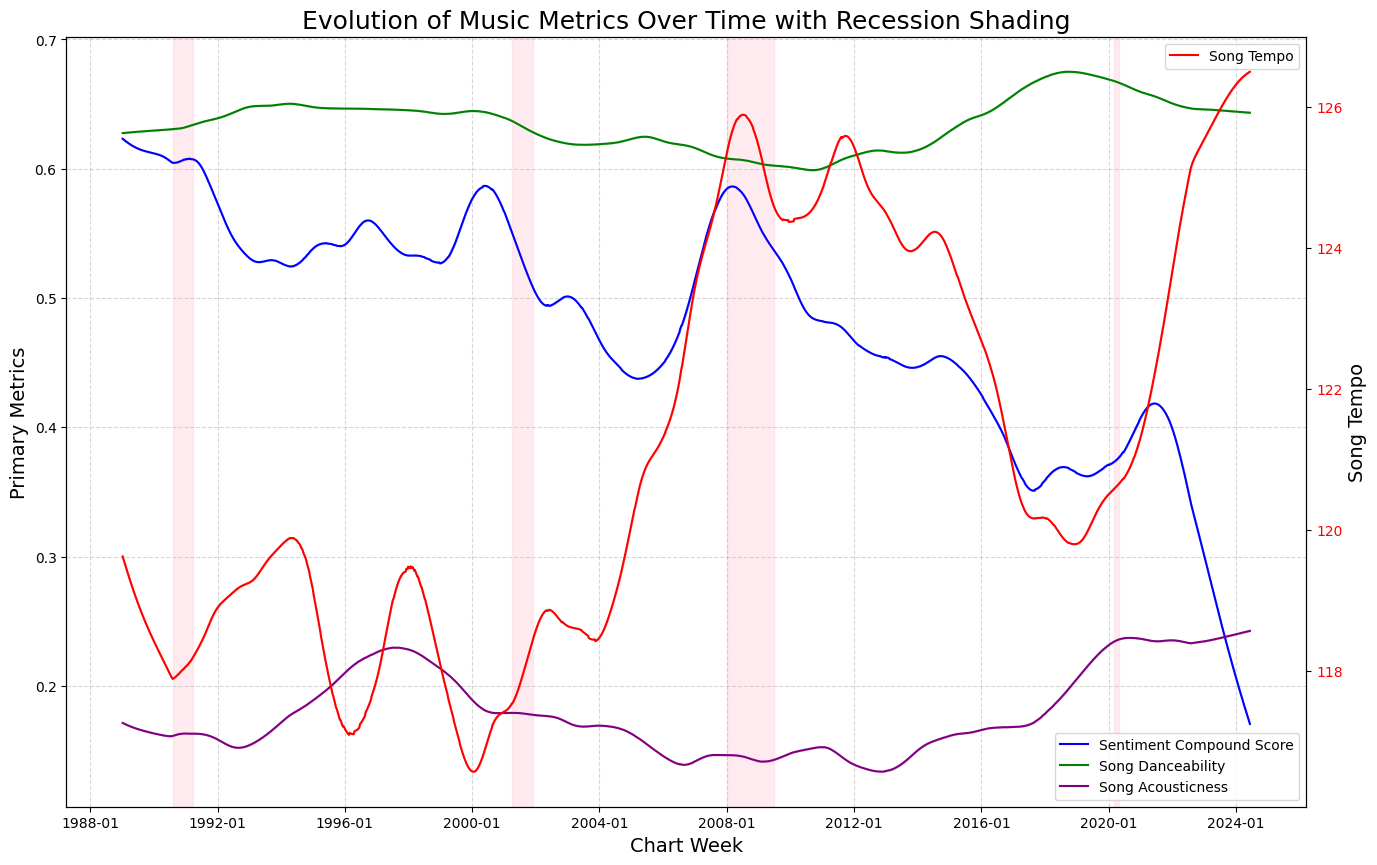

In [ ]:
df_charts = recession_music.copy()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Ensure 'chart_week' is in datetime format
df_charts['chart_week'] = pd.to_datetime(df_charts['chart_week'])

# Sort the DataFrame by 'chart_week'
df_charts = df_charts.sort_values(by='chart_week')

# Apply LOWESS smoothing for all variables
lowess_sentiment = lowess(df_charts['sentiment_compound_score'], df_charts['chart_week'], frac=0.1, it=0)
df_charts['sentiment_compound_score_lowess'] = lowess_sentiment[:, 1]

lowess_danceability = lowess(df_charts['song_danceability'], df_charts['chart_week'], frac=0.1, it=0)
df_charts['song_danceability_lowess'] = lowess_danceability[:, 1]

lowess_acousticness = lowess(df_charts['song_acousticness'], df_charts['chart_week'], frac=0.1, it=0)
df_charts['song_acousticness_lowess'] = lowess_acousticness[:, 1]

# lowess_stop_words = lowess(df_charts['stop_words_ratio'], df_charts['chart_week'], frac=0.1, it=0)
# df_charts['stop_words_ratio_lowess'] = lowess_stop_words[:, 1]

# lowess_len_ms = lowess(df_charts['song_len_ms'], df_charts['chart_week'], frac=0.1, it=0)
# df_charts['song_len_ms_lowess'] = lowess_len_ms[:, 1]

lowess_tempo = lowess(df_charts['song_tempo'], df_charts['chart_week'], frac=0.1, it=0)
df_charts['song_tempo_lowess'] = lowess_tempo[:, 1]

# Identify contiguous blocks of recession periods
df_charts['recession_shift'] = df_charts['recession'].diff().ne(0).cumsum()
recession_periods = df_charts[df_charts['recession'] == 1].groupby('recession_shift')['chart_week'].agg(['min', 'max'])

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot the primary axis lines
sns.lineplot(data=df_charts, x='chart_week', y='sentiment_compound_score_lowess', ax=ax1, label='Sentiment Compound Score', color='blue')
sns.lineplot(data=df_charts, x='chart_week', y='song_danceability_lowess', ax=ax1, label='Song Danceability', color='green')
sns.lineplot(data=df_charts, x='chart_week', y='song_acousticness_lowess', ax=ax1, label='Song Acousticness', color='purple')
# sns.lineplot(data=df_charts, x='chart_week', y='stop_words_ratio_lowess', ax=ax1, label='Stop Words Ratio', color='orange')
# sns.lineplot(data=df_charts, x='chart_week', y='song_len_ms_lowess', ax=ax1, label='Song Length (ms)', color='orange')

# Add shading for recession periods
for _, row in recession_periods.iterrows():
    ax1.axvspan(row['min'], row['max'], color='pink', alpha=0.3)

# Create a secondary y-axis for 'song_tempo'
ax2 = ax1.twinx()
sns.lineplot(data=df_charts, x='chart_week', y='song_tempo_lowess', ax=ax2, label='Song Tempo', color='red', linestyle='-')

# Customize primary axis
ax1.set_xlabel('Chart Week', fontsize=14)
ax1.set_ylabel('Primary Metrics', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Evolution of Music Metrics Over Time with Recession Shading', fontsize=18)
ax1.grid(visible=True, linestyle='--', alpha=0.5)

# Customize secondary axis
ax2.set_ylabel('Song Tempo', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Format the x-axis as datetime
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator(interval=3))
plt.xticks(rotation=45)

# Add legends for both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
##### song lyrics text analysis

#### using NLTK

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources if not already available
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load dataset
#spotify_lyrics = pd.read_csv("60000-spotify-song-lyrics.csv")

# Initialize stop words and term frequency counter
stop_words = set(stopwords.words('english'))
term_frequency = Counter()

# Drop missing values in 'text' column
#spotify_lyrics = spotify_lyrics.dropna(subset=['text'])
#spotify_lyrics['text'] = spotify_lyrics['text'].astype(str)

# Iterate over each row in the 'text' column
for lyrics in recession_music['lyrics']:
    # Tokenize and clean up lyrics
    tokens = word_tokenize(lyrics.lower())  # Tokenize and lowercase
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove non-alphanumeric and stopwords

    # Update the term frequency counter
    term_frequency.update(filtered_tokens)

# Print the top 20 most common terms
print("Top 20 Term Frequency:", term_frequency.most_common(20))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 20 Term Frequency: [('love', 416336), ('like', 415775), ('know', 398258), ('yeah', 381589), ('got', 366189), ('na', 359334), ('oh', 316839), ('baby', 300872), ('get', 279352), ('go', 225695), ('let', 216769), ('one', 196791), ('wan', 194104), ('ca', 180841), ('want', 179301), ('time', 176027), ('never', 170826), ('make', 167886), ('see', 166559), ('gon', 166458)]


In [ ]:
# determine mean of key song features across recession periods
recession = recession_music[recession_music['recession'] == 1]
not_recession = recession_music[recession_music['recession'] == 0]

print(recession.sentiment_compound_score.mean())
print(not_recession.sentiment_compound_score.mean())
print('\n')
print(recession.stop_words_ratio.mean())
print(not_recession.stop_words_ratio.mean())
print('\n')
print(recession.song_danceability.mean())
print(not_recession.song_danceability.mean())

0.5513050180940893
0.47721014836112713


0.5400124505802856
0.5318068329306198


0.6190601527945315
0.6359231129001343


In [ ]:
# Drop missing values in 'text' column and ensure all entries are strings
#spotify_lyrics = spotify_lyrics.dropna(subset=['text'])
#spotify_lyrics['text'] = spotify_lyrics['text'].astype(str)

# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',
                        max_features=1000,  # Limit to top 1000 features
                        ngram_range=(1, 3))  # Use unigrams, bigrams, and trigrams

# Transform the 'text' column to TF-IDF features
transformed_text = tfidf.fit_transform(recession_music['lyrics_tokenized'])

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Convert to DataFrame for better visualization
spotify_songs_df = pd.DataFrame(transformed_text.toarray(), columns=feature_names)

# Display the resulting DataFrame
print(spotify_songs_df.head())

   act  act like  afraid   ah  ah ah  ah ah ah  ahead  ahh        ai  ai gon  \
0  0.0       0.0     0.0  0.0    0.0       0.0    0.0  0.0  0.000000     0.0   
1  0.0       0.0     0.0  0.0    0.0       0.0    0.0  0.0  0.000000     0.0   
2  0.0       0.0     0.0  0.0    0.0       0.0    0.0  0.0  0.000000     0.0   
3  0.0       0.0     0.0  0.0    0.0       0.0    0.0  0.0  0.000000     0.0   
4  0.0       0.0     0.0  0.0    0.0       0.0    0.0  0.0  0.108929     0.0   

   ...   yeah oh  yeah want  yeah yeah  yeah yeah yeah      year  yesterday  \
0  ...  0.036044   0.043731        0.0             0.0  0.000000        0.0   
1  ...  0.000000   0.000000        0.0             0.0  0.000000        0.0   
2  ...  0.000000   0.000000        0.0             0.0  0.000000        0.0   
3  ...  0.000000   0.000000        0.0             0.0  0.251277        0.0   
4  ...  0.000000   0.000000        0.0             0.0  0.000000        0.0   

    yo  york  young  yuh  
0  0.0   0.0    0

In [ ]:
# Sum TF-IDF scores for each term across all songs
term_importance = spotify_songs_df.sum(axis=0).sort_values(ascending=False)
top_20_terms = term_importance.head(20)

# Convert to a DataFrame for better visualization
top_20_df = pd.DataFrame({
    'Term': top_20_terms.index,
    'TF-IDF Score': top_20_terms.values
})

# Display the DataFrame
print(top_20_df)
top_terms = top_20_df.Term.to_list()[:10]
print(top_terms)

      Term  TF-IDF Score
0     love   8022.354083
1     know   6511.946131
2     like   6420.992923
3     yeah   6118.881661
4      got   5917.552392
5     babi   5712.324272
6       oh   5571.707572
7       na   5546.289368
8     want   4377.765805
9      let   4347.647238
10    time   4079.424840
11    girl   4020.678286
12      ca   3919.913083
13    make   3910.405977
14    feel   3887.050868
15     say   3834.313198
16    come   3812.567410
17     wan   3809.870123
18  wan na   3794.718908
19     way   3521.346096
['love', 'know', 'like', 'yeah', 'got', 'babi', 'oh', 'na', 'want', 'let']


In [ ]:
## code for the final data set which has year and song lyrics, to look at lyrics frequency count grouped by year

# Initialize stop words and term frequency counter
stop_words = set(stopwords.words('english'))

# the term frequency dictionary lists for each year
yearly_term_frequencies = {}

# Iterate over each song's lyrics and group by year
for idx, row in recession_music.iterrows():
    year = row['year']
    lyrics = row['lyrics_tokenized']

    tokens = word_tokenize(lyrics.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]

    if year not in yearly_term_frequencies:
        yearly_term_frequencies[year] = Counter()

    # Update the term frequency counter for that year
    yearly_term_frequencies[year].update(filtered_tokens)

# Print term frequency for each year
for year, tf in yearly_term_frequencies.items():
    print(f"Term Frequency for year {year}:")
    print(tf)
    print("\n")

Term Frequency for year 2022:
Counter({'yeah': 14308, 'like': 12201, 'got': 11356, 'know': 10383, 'get': 9301, 'na': 8071, 'love': 7302, 'ai': 7113, 'go': 6354, 'want': 6209, 'babi': 5715, 'que': 5673, 'oh': 5643, 'ca': 5575, 'wan': 5376, 'la': 5206, 'let': 5099, 'make': 4983, 'need': 4836, 'time': 4789, 'back': 4627, 'feel': 4565, 'one': 4326, 'could': 4273, 'gon': 4155, 'never': 4115, 'way': 3987, 'come': 3917, 'say': 3770, 'take': 3706, 'nigga': 3414, 'tell': 3361, 'night': 3272, 'tú': 3230, 'yo': 3114, 'right': 3010, 'te': 2944, 'girl': 2861, 'keep': 2852, 'see': 2793, 'fuck': 2782, 'ey': 2726, 'bitch': 2611, 'look': 2524, 'de': 2520, 'ooh': 2508, 'shit': 2489, 'give': 2467, 'good': 2427, 'would': 2400, 'parti': 2370, 'life': 2282, 'think': 2265, 'still': 2256, 'put': 2219, 'hey': 2215, 'mind': 2177, 'lo': 2161, 'woman': 2139, 'big': 2047, 'said': 2025, 'tryna': 2016, 'el': 2012, 'heart': 2005, 'man': 1997, 'day': 1974, 'ayi': 1913, 'turn': 1906, 'new': 1897, 'mine': 1894, 'wo': 18

In [ ]:
# remove all shared most common terms e.g. like, yeah babi, got, na, to see unique words

# the term frequency dictionary lists for each year
yearly_frequencies = {}

# frequent terms list
frequent_terms = top_terms

# Iterate over each song's lyrics and group by year
for idx, row in recession_music.iterrows():
    year = row['year']
    lyrics = row['lyrics_tokenized']

    tokens = word_tokenize(lyrics.lower())
    infrequent_filtered_tokens = [word for word in tokens if word not in stop_words and word not in frequent_terms]

    if year not in yearly_frequencies:
        yearly_frequencies[year] = Counter()

    # Update the term frequency counter for that year
    yearly_frequencies[year].update(infrequent_filtered_tokens)

# Print term frequency for each year
for year, tf in yearly_frequencies.items():
    print(f"Term Frequency for year {year}:")
    print(tf)
    print("\n")

Term Frequency for year 2022:
Counter({'get': 9301, 'ai': 7113, 'go': 6354, 'que': 5673, 'ca': 5575, 'wan': 5376, 'la': 5206, 'make': 4983, 'need': 4836, 'time': 4789, 'back': 4627, 'feel': 4565, 'one': 4326, 'could': 4273, 'gon': 4155, 'never': 4115, 'way': 3987, 'come': 3917, 'say': 3770, 'take': 3706, 'nigga': 3414, 'tell': 3361, 'night': 3272, 'tú': 3230, 'yo': 3114, 'right': 3010, 'te': 2944, 'girl': 2861, 'keep': 2852, 'see': 2793, 'fuck': 2782, 'ey': 2726, 'bitch': 2611, 'look': 2524, 'de': 2520, 'ooh': 2508, 'shit': 2489, 'give': 2467, 'good': 2427, 'would': 2400, 'parti': 2370, 'life': 2282, 'think': 2265, 'still': 2256, 'put': 2219, 'hey': 2215, 'mind': 2177, 'lo': 2161, 'woman': 2139, 'big': 2047, 'said': 2025, 'tryna': 2016, 'el': 2012, 'heart': 2005, 'man': 1997, 'day': 1974, 'ayi': 1913, 'turn': 1906, 'new': 1897, 'mine': 1894, 'wo': 1893, 'hold': 1866, 'around': 1860, 'ta': 1854, 'se': 1823, 'ya': 1803, 'tri': 1791, 'eye': 1789, 'realli': 1757, 'tonight': 1740, 'en': 173

## Diagnostic Analysis

Predictive

                                    lyrics_tokenized  cluster
0  i want lot christma there one thing i need i c...        1
1  rockin around christma tree at christma parti ...        1
2  jingl bell jingl bell jingl bell rock jingl be...        1
3  have holli jolli christma it best time year i ...        1
4  there ai gold river that i wash hand forev i k...        1


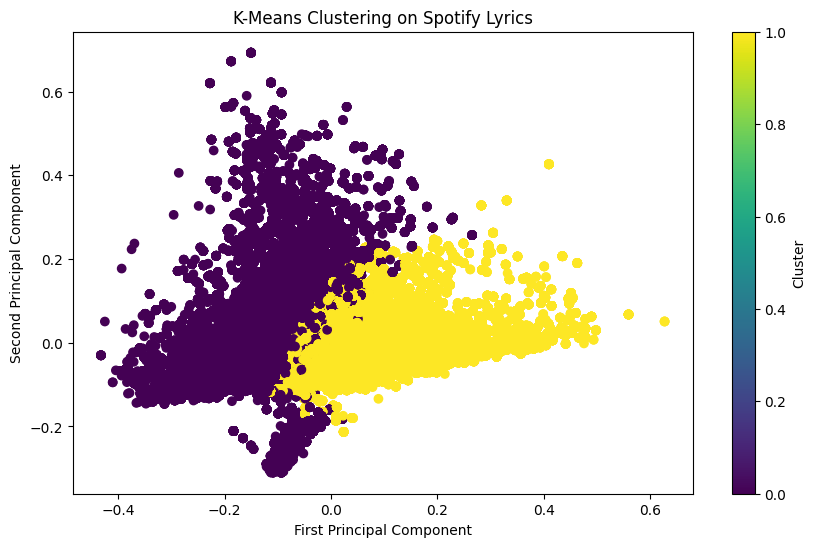

In [ ]:
### clustering on the text analysis with tf-idf

# Perform K-means clustering
n_clusters = 2  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
recession_music['cluster'] = kmeans.fit_predict(transformed_text)

# Display the resulting DataFrame with clusters
print(recession_music[['lyrics_tokenized', 'cluster']].head())


# Reduce dimensions for visualization
pca = PCA(n_components=2)
transformed_text_pca = pca.fit_transform(transformed_text.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(transformed_text_pca[:, 0], transformed_text_pca[:, 1], c=recession_music['cluster'], cmap='viridis')
plt.title('K-Means Clustering on Spotify Lyrics')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label='Cluster')
plt.show()

         Recession 0 (%)  Recession 1 (%)
cluster                                  
0              92.273241         7.726759
1              90.818060         9.181940


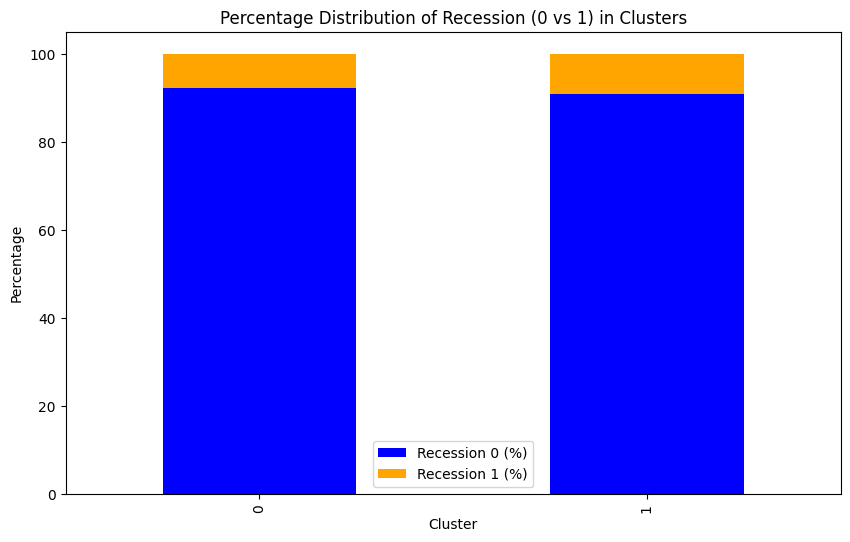

In [ ]:
# analyze both clusters to see percentage of recession vs non-recession

# Group by cluster and calculate the value counts of recession
cluster_recession_distribution = (
    recession_music.groupby('cluster')['recession']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

# Rename columns for better understanding
cluster_recession_distribution.columns = ['Recession 0 (%)', 'Recession 1 (%)']

# Display the percentage distribution
print(cluster_recession_distribution)

# Visualize the percentages with a bar plot
cluster_recession_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])
plt.title('Percentage Distribution of Recession (0 vs 1) in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage')

plt.show()


In [ ]:
recession_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142860 entries, 0 to 142859
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   chart_week                    142860 non-null  object 
 1   current_week                  142860 non-null  int64  
 2   title                         142860 non-null  object 
 3   performer                     142860 non-null  object 
 4   peak_pos                      142860 non-null  int64  
 5   wks_on_chart                  142860 non-null  int64  
 6   recession                     142860 non-null  int64  
 7   year                          142860 non-null  int64  
 8   song_artist_followers         142860 non-null  float64
 9   song_len_ms                   142860 non-null  float64
 10  song_explicity                142860 non-null  bool   
 11  track_release_date            142860 non-null  object 
 12  track_release_date_precision  142860 non-nul

In [ ]:
df = recession_music.copy()

   song_len_ms  song_acousticness  song_danceability  song_speechiness  \
0            0                  0                  1                 0   
1            0                  2                  2                 0   
2            0                  2                  2                 0   
3            0                  2                  2                 0   
4            0                  2                  2                 0   

   song_tempo  sentiment_compound_score  stop_words_ratio  song_explicity  \
0           2                         3                 2               0   
1           0                         3                 2               0   
2           1                         3                 1               0   
3           2                         3                 2               0   
4           2                         2                 2               0   

   song_modality  recession  
0              1          0  
1              1          0  
2 

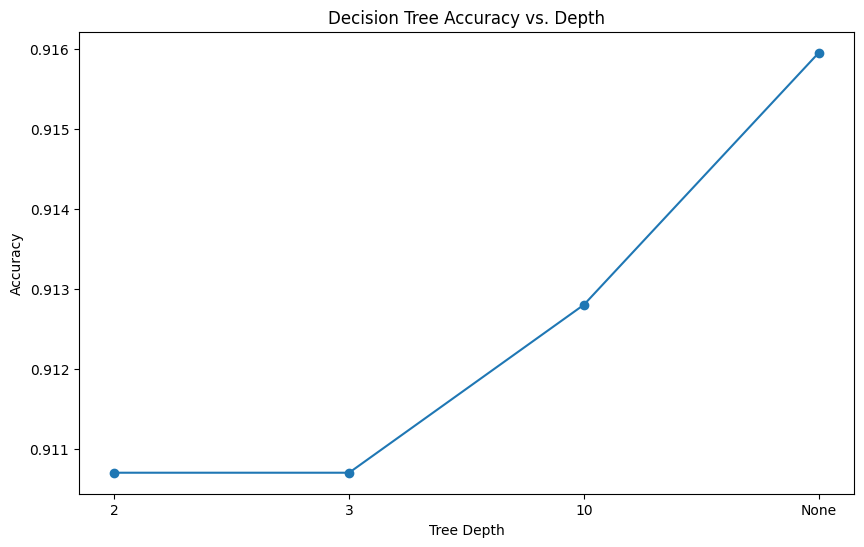

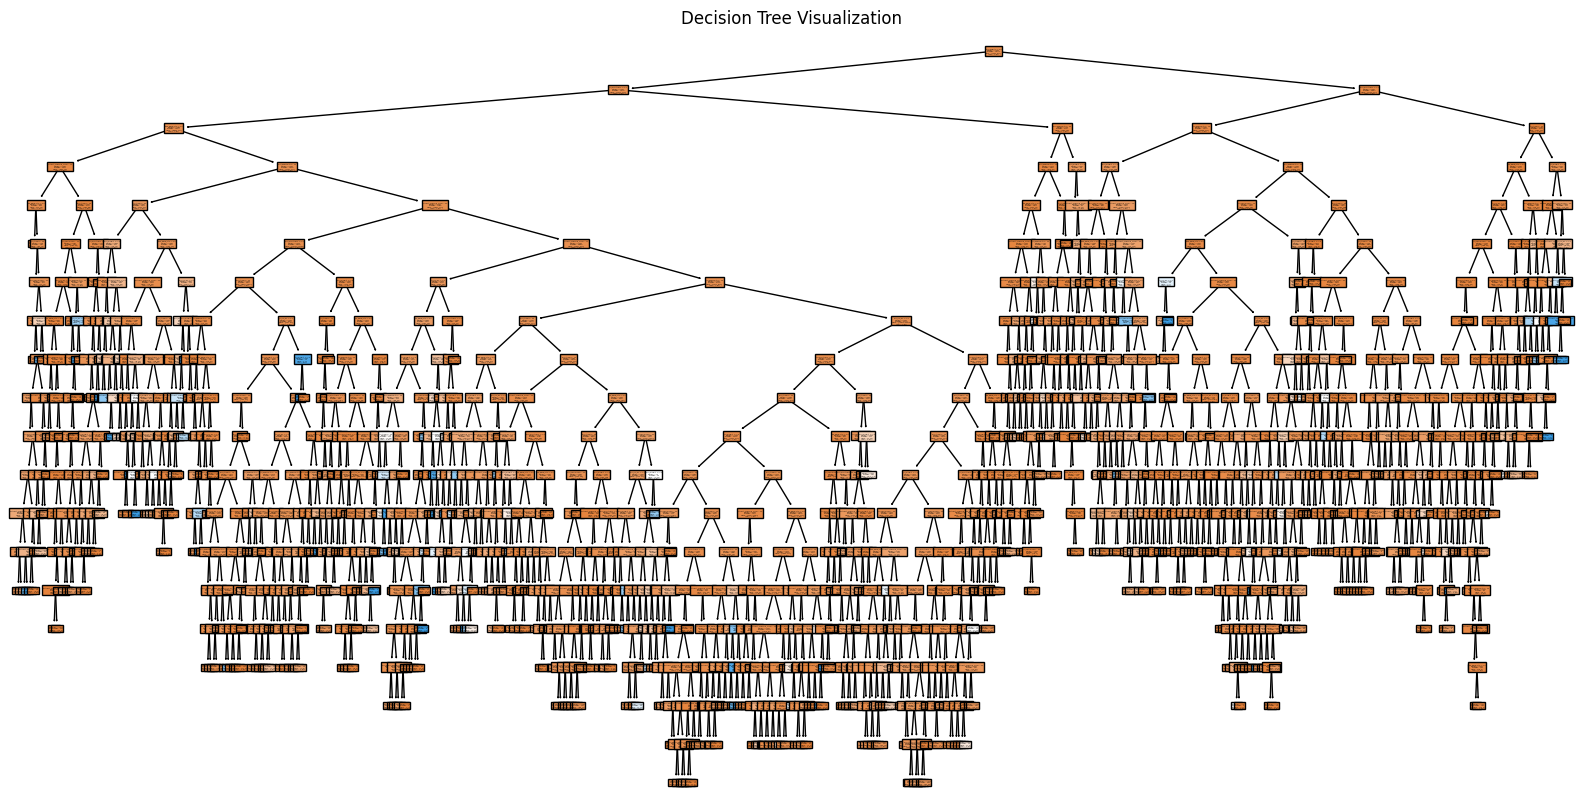

                    Feature  Information Gain
4                song_tempo          0.175400
1         song_acousticness          0.144438
2         song_danceability          0.131409
8             song_modality          0.118618
6          stop_words_ratio          0.112020
0               song_len_ms          0.110467
3          song_speechiness          0.087014
5  sentiment_compound_score          0.085632
7            song_explicity          0.035003


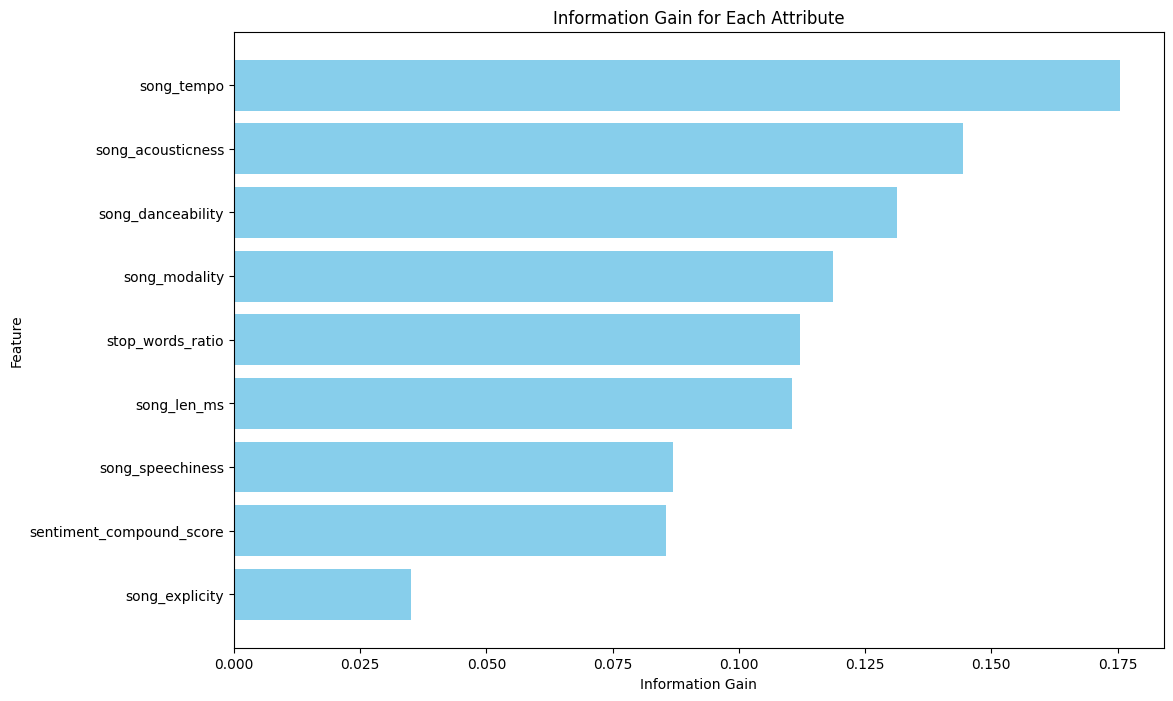

In [ ]:
## CLASSIFICATION

# decide categorical variables
predicting_numeric_var = ['song_len_ms','song_acousticness','song_danceability','song_speechiness','song_tempo','sentiment_compound_score','stop_words_ratio']
predicting_categorical_var = ['song_explicity','song_modality', 'recession']
predicting_var = ['song_len_ms','song_acousticness','song_danceability','song_speechiness','song_tempo','sentiment_compound_score','stop_words_ratio', 'song_explicity','song_modality', 'recession']

# song_explicity - convert 0 for false and 1 for true
df['song_explicity'] = df['song_explicity'].apply(lambda x: 1 if x == 1 else 0)

# song_mode - 1 if the song is in major key and 0 if the song is in minor key
df['song_modality'] = df['song_modality'].astype('int64')

# # song_danceability - convert to < 0.5: low danceability and > 0.5: high danceability
# df['song_danceability'] = df['song_danceability'].apply(lambda x: 'Low' if x <= 0.5 else 'High')

# # sentiment_compound score - negative if score < 0 and positive if score >= 0
# df['sentiment_compound_score'] = df['sentiment_compound_score'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# # stop_words_ratio - high usage of stop words if ratio > 0.5, low usage of stop words <= 0.5
# df['stop_words_ratio'] = df['stop_words_ratio'].apply(lambda x: 'Low' if x <= 0.5 else 'High')

from sklearn.preprocessing import KBinsDiscretizer

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')  # Uniform bins

# Apply discretization to each numerical variable
for col in predicting_numeric_var:
    df[col] = kbins.fit_transform(df[[col]]).astype(int).flatten()

df_selected = df[predicting_var]
print(df_selected.head())

# Encode categorical variables
label_encoders = {}
for column in df_selected.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = df_selected.drop('recession', axis=1)
y = df_selected['recession']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df_selected.head()

# Step 1: Train a basic Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Step 2: Predict on test data and measure accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Basic Decision Tree Accuracy: {accuracy:.2f}')
# Use zero_division=0 to handle undefined metrics
print(classification_report(y_test, y_pred, zero_division=0))

# Step 3: Experiment with different tree depths
depths = [2, 3, 10, None]
accuracies = []
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'Depth: {depth}, Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred, zero_division=0))

# Step 4: Plot accuracies vs. tree depths
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in depths], accuracies, marker='o')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

# Step 5: Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Assuming the data has already been preprocessed and split into X_train, y_train
# If not, preprocess the data using the previously provided code snippet

# Train a Decision Tree classifier using Information Gain (entropy)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Extract feature importances (Information Gain) from the model
information_gain = clf.feature_importances_

# Create a DataFrame to display feature names and their Information Gain
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': information_gain
}).sort_values(by='Information Gain', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot the Information Gain for each feature
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Information Gain'], color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain for Each Attribute')
plt.gca().invert_yaxis()
plt.show()